In [1]:
from fractions import Fraction
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#define the function that allows the user to play the game
def game():
    while True:
        try: 
            n = int(input("How many glasses are in the circle?"))
            break
        except:
            print("Error: non-integer entered.")
    glasses = [0]*n
    while True:
        while True:
            try:
                ali = input("How much water does Ali add to each cup? (e.g. n=4: 1/4 0 1/4 0)")
                ali_list = [float(Fraction(a)) for a in ali.split()]
                if sum(ali_list) != 0.5 or len(ali_list) != n or not all(0 <= a <= 0.5 for a in ali_list):
                    raise Exception
                break
            except:
                print("Error: invalid volumes.")
        for i in range(0,n):
            glasses[i] = glasses[i]+ali_list[i]
        print("After Ali's turn:", glasses)
        if any(glass > 1 for glass in glasses):
            print("Ali wins!")
            break
        while True:
            try:
                beth = int(input("What is the number of the first of the two adjacent glasses that Beth will empty?"))
                if not 0 < beth <= n:
                    raise Exception
                break
            except:
                print("Error: invalid number.")
        glasses[(beth-1)%n] = 0
        glasses[beth%n] = 0
        print("After Beth's turn:", glasses)

In [3]:
#call the function to play the game
game()

How many glasses are in the circle? 6
How much water does Ali add to each cup? (e.g. n=4: 1/4 0 1/4 0) 1/6 0 1/6 0 1/6 0


After Ali's turn: [0.16666666666666666, 0.0, 0.16666666666666666, 0.0, 0.16666666666666666, 0.0]


What is the number of the first of the two adjacent glasses that Beth will empty? 1


After Beth's turn: [0, 0, 0.16666666666666666, 0.0, 0.16666666666666666, 0.0]


How much water does Ali add to each cup? (e.g. n=4: 1/4 0 1/4 0) 5/18 0 1/9 0 1/9 0


After Ali's turn: [0.2777777777777778, 0.0, 0.2777777777777778, 0.0, 0.2777777777777778, 0.0]


What is the number of the first of the two adjacent glasses that Beth will empty? 1


After Beth's turn: [0, 0, 0.2777777777777778, 0.0, 0.2777777777777778, 0.0]


How much water does Ali add to each cup? (e.g. n=4: 1/4 0 1/4 0) 0 0 0.25 0 0.25 0


After Ali's turn: [0.0, 0.0, 0.5277777777777778, 0.0, 0.5277777777777778, 0.0]


What is the number of the first of the two adjacent glasses that Beth will empty? 3


After Beth's turn: [0.0, 0.0, 0, 0, 0.5277777777777778, 0.0]


How much water does Ali add to each cup? (e.g. n=4: 1/4 0 1/4 0) 0 0 0 0 0.5 0


After Ali's turn: [0.0, 0.0, 0.0, 0.0, 1.0277777777777777, 0.0]
Ali wins!


In [4]:
#define the function to plot the sequence v_k up to k = 50 for 6 <= n <= N
def plot(N):
    vals2 = []
    for i in range(6,N+1):
        vals = []
        for k in range(1,51):
            vals.append((1-(1/i)-(i/4))*(1-(2/i))**(k-1)+(i/4)-(1/2))
        vals2.append(vals)
    subs = np.arange(1,len(vals2[0])+1)
    for j in range(0,len(vals2),2):
        labell = "n="+str(j+6)
        plt.plot(subs, vals2[j], label=labell)
    two = [2]*len(vals2[0])
    plt.plot(subs, two)
    plt.legend(prop={'size': 9})
    plt.savefig('graph.png')

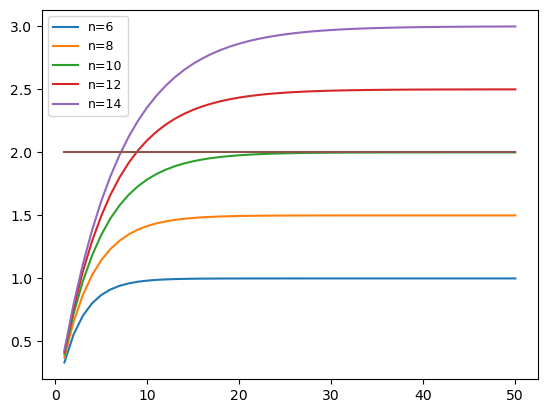

In [5]:
#plot the sequence v_k up to k = 50 for 6 <= n <= 14
plot(14)